In [16]:
import plotly.graph_objects as go

import json
from dateutil import parser
from datetime import datetime

In [13]:
map_json = json.load(open('all_tiers.json'))

In [72]:
def age_in_days(dt):
    return (datetime.today() - parser.parse(dt)).days

def difficulty(m):
    return age_in_days(m['info']['added']) / m['info']['completions']

def filter_tier(maps, tier):
    return [m for m in maps if m['info']['tier'] == tier]

def create_age_scatter(maps, tier):
    tier_maps = filter_tier(maps, tier)
    return go.Scatter(
            x=[age_in_days(m['info']['added']) for m in tier_maps],
            y=[difficulty(m) for m in tier_maps],
            fillcolor='red',
            mode='markers',
            marker_size=[m['info']['tier']*5 for m in tier_maps]
        )

def create_tier_scatter(maps, tier):
    tier_maps = filter_tier(maps, tier)
    return go.Scatter(
            x=[tier for _ in tier_maps],
            y=[difficulty(m) for m in tier_maps],
            fillcolor='red',
            mode='markers',
            marker_size=[20 for m in tier_maps]
        )

In [73]:
map_json[0]

{'name': 'kz_giantbean',
 'info': {'completions': 50,
  'times played': 526,
  'tier': 1,
  'stage_type': 'Linear',
  'bonus': 2,
  'checkpoints': 0,
  'author': 'Kreedz',
  'added': '2023-08-24'}}

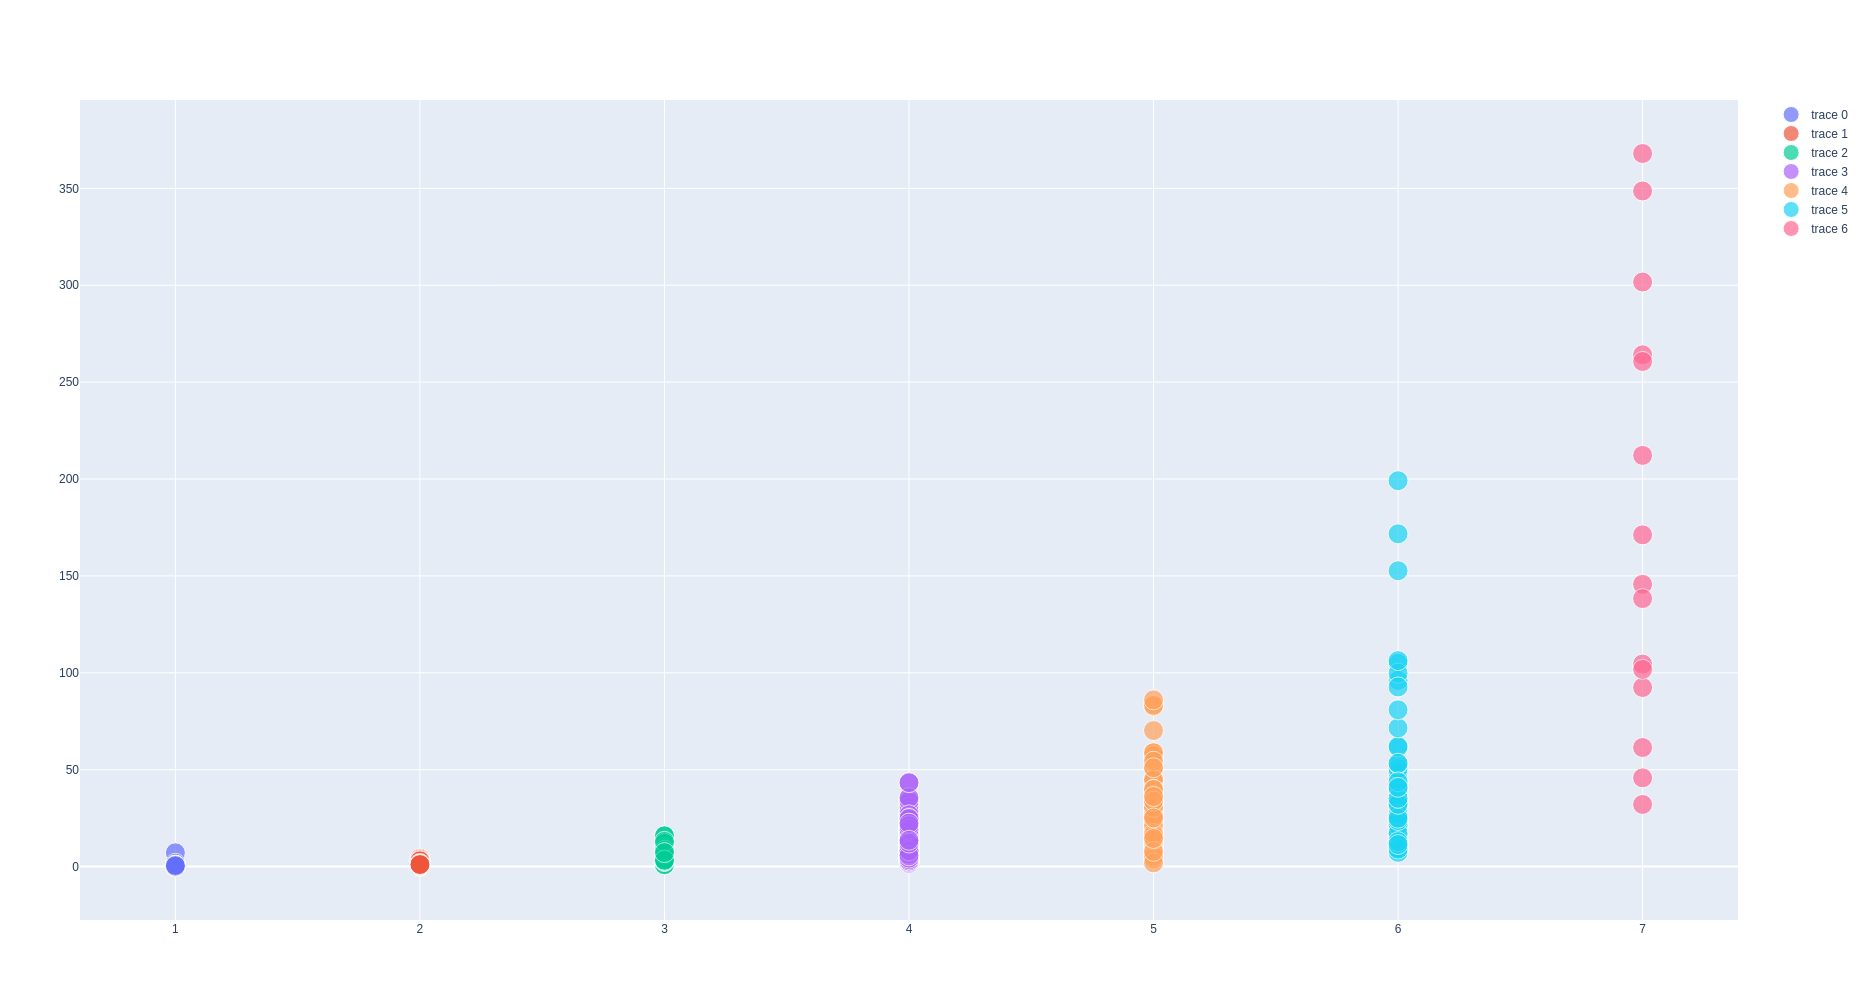

In [74]:
fig = go.Figure(
    data=[create_tier_scatter(map_json, tier) for tier in range(1,8)],
    layout={
        'height': 1000,
    }
)

fig.show()

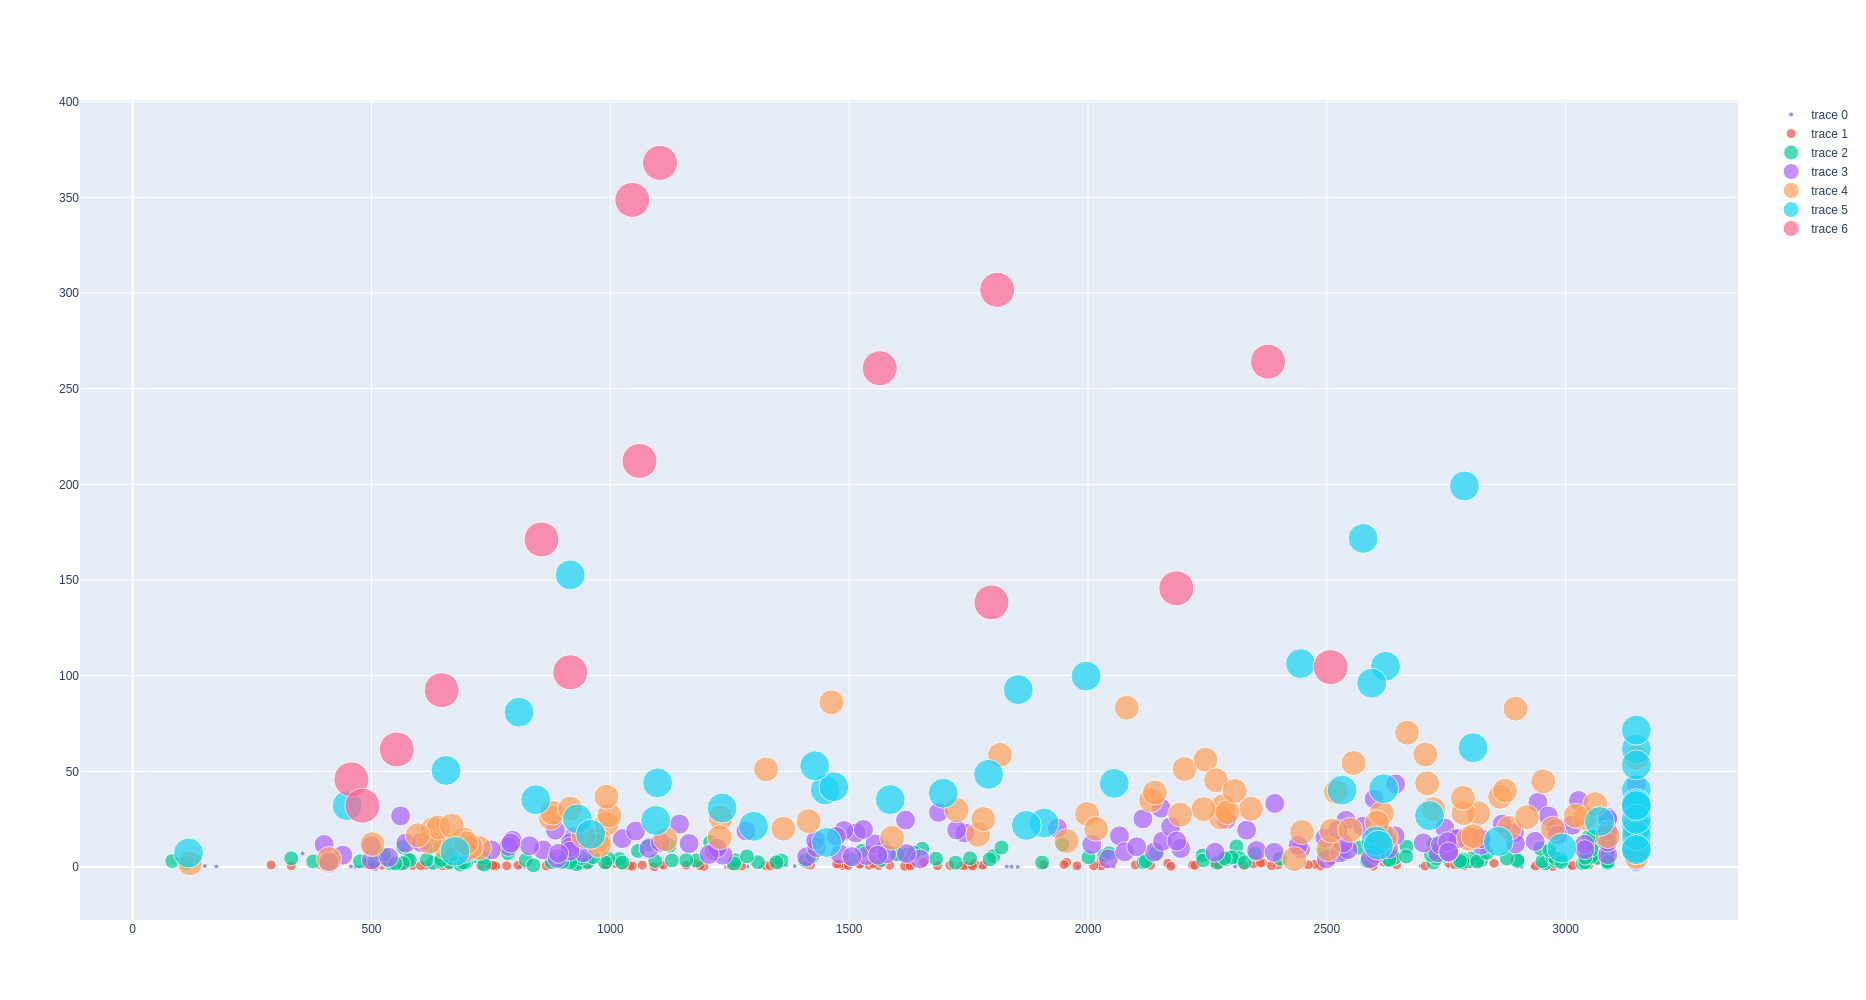

In [75]:
fig = go.Figure(
    data=[create_age_scatter(map_json, tier) for tier in range(1,8)],
    layout={
        'height': 1000,
    }
)

fig.show()